# Predictions on different data quality

## Data - only one column

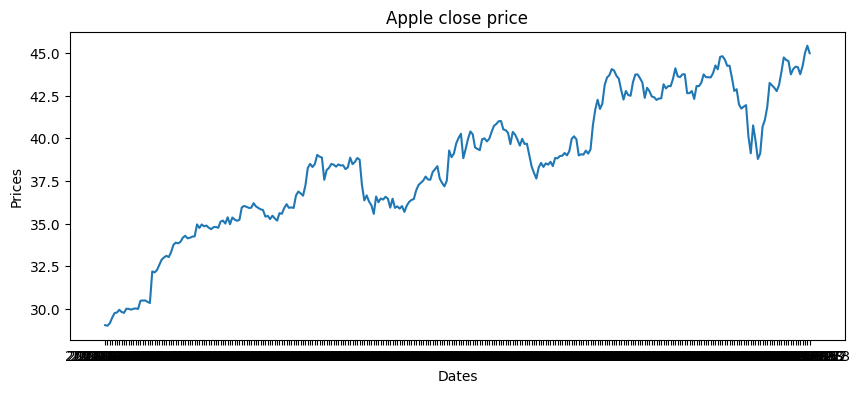

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn
from metrics.utils import MetricLevel
from metrics.utils import Strength

stock = StockMarketSeries()
time_series_start = 0
time_series_end = 300
apple = stock.prepare_time_series("Apple", "../data/apple.csv", time_series_start, time_series_end)

apple_close = stock.create_single_series(SeriesColumn.CLOSE.value)
stock.plot_single_series(apple_close, SeriesColumn.CLOSE)

### Noised data and its quality

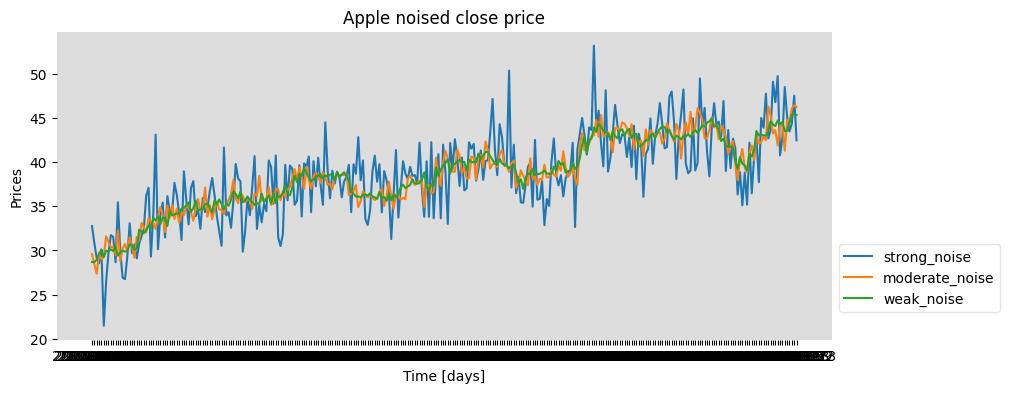

In [2]:
stock.plot_multiple_series("noised close price",
                           strong_noise=stock.all_series_noised[Strength.STRONG][SeriesColumn.CLOSE],
                           moderate_noise=stock.all_series_noised[Strength.MODERATE][SeriesColumn.CLOSE],
                           weak_noise=stock.all_series_noised[Strength.WEAK][SeriesColumn.CLOSE])

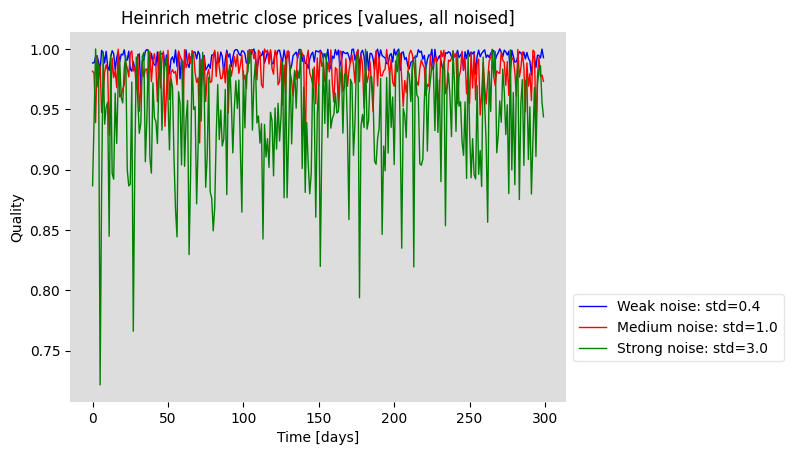

In [3]:
from metrics.correctness import HeinrichCorrectnessMetric

heinrich = HeinrichCorrectnessMetric(stock,
                                     alpha={SeriesColumn.OPEN: 1.6,
                                            SeriesColumn.CLOSE: 2.1,
                                            SeriesColumn.ADJ_CLOSE: 1.7,
                                            SeriesColumn.HIGH: 2.0,
                                            SeriesColumn.LOW: 2.3,
                                            SeriesColumn.VOLUME: 3.1})

weak, moderate, strong = heinrich.values_qualities(SeriesColumn.CLOSE, is_alpha=False)
heinrich.draw_heinrich_qualities(weak, moderate, strong, MetricLevel.VALUES, is_alpha=False,
                                 column_name=SeriesColumn.CLOSE)

## Statistical methods

In [4]:
from metrics.utils import DefectsSource, DefectionRange
from predictions.prediction import Prediction
from arima import ManualArima

prediction_start = 21
prediction_end = 31
iterations = 3

## AR(5)

In [5]:
arima = Prediction(stock, ManualArima, prediction_start, prediction_end,
                   DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations, p=5, q=0)

### Example

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

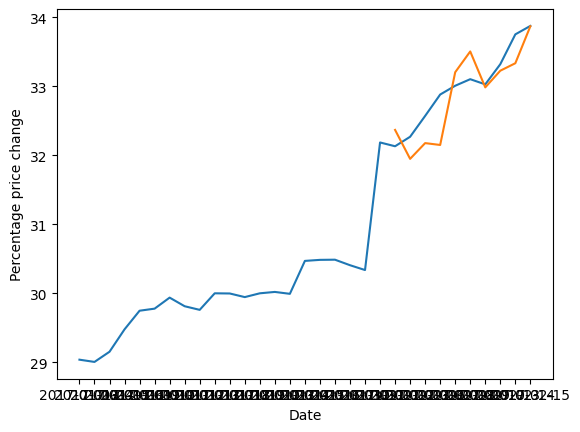

RMS: 0.351 


In [6]:
arima.present_prediction()

### Statistics

In [7]:
arima.compute_statistics()

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale Avg elapsed time [ms]  Std dev elapsed time  Avg RMS  \
0          none                   403             11.269428    0.351   
1          weak            487.333333             12.662280    2.014   
2      moderate            312.666667              6.658328    3.238   
3        strong            235.666667              1.527525    6.148   

   Std dev RMS  
0          0.0  
1          0.0  
2          0.0  
3          0.0  


C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\arima.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_with_prediction = data_with_prediction.append(prediction_series)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no asso

## ARIMA(5,1,5)

In [8]:
arima = Prediction(stock, ManualArima, prediction_start, prediction_end,
                   DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations, p=5, q=2)

### Example

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

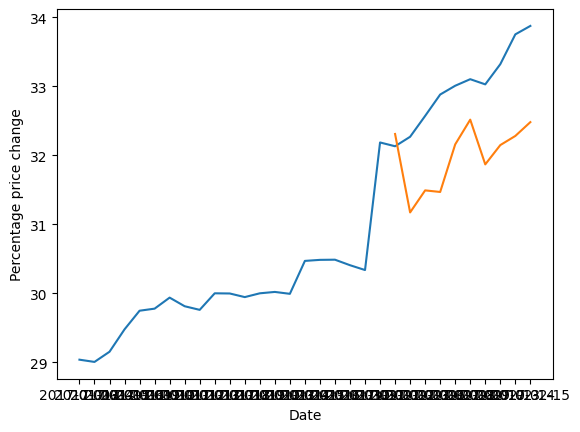

RMS: 1.109 


In [9]:
arima.present_prediction()

### Statistics

In [10]:
arima.compute_statistics()

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale  Avg elapsed time [ms]  Std dev elapsed time  Avg RMS  \
0          none            1118.666667             38.175035    1.109   
1          weak            1120.333333             10.115994    1.761   
2      moderate            1058.666667              5.507571    3.583   
3        strong             984.333333              9.865766    6.358   

   Std dev RMS  
0          0.0  
1          0.0  
2          0.0  
3          0.0  


C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\arima.py:78: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_with_prediction = data_with_prediction.append(prediction_series)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no asso

## Reservoir computing

In [11]:
from predictions.reservoir import Reservoir

prediction_start = 280
prediction_end = 300

reservoir = Prediction(stock, Reservoir, prediction_start, prediction_end,
                       DefectionRange.ALL, DefectsSource.NOISE, SeriesColumn.CLOSE, iterations=iterations)

### Example

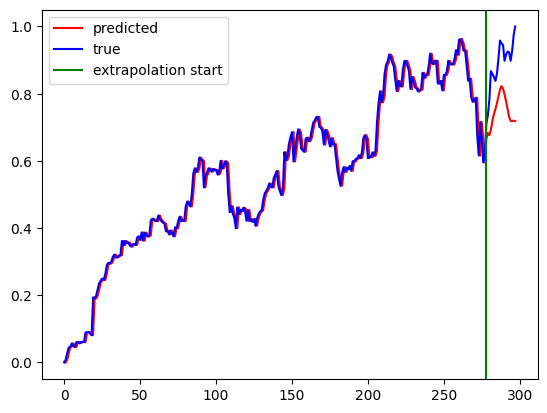

RMS: 2.866 


In [12]:
reservoir.present_prediction()

### Statistics

In [13]:
reservoir.compute_statistics()

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(


Statistics of SeriesColumn.CLOSE in Apple with 3 iterations:
  Defects scale  Avg elapsed time [ms]  Std dev elapsed time   Avg RMS  \
0          none              25.333333              1.527525  3.826000   
1          weak              24.333333              0.577350  4.626667   
2      moderate              24.000000              0.000000  4.123333   
3        strong              24.333333              0.577350  6.825667   

   Std dev RMS  
0     0.313254  
1     0.396450  
2     0.913475  
3     0.408955  


C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(
